In [1]:
import numpy as np 
import os
import datetime
import matplotlib.pyplot as plt 
from astropy.table import Table, join, unique
from astropy import units as u
from astropy import constants as const
from matplotlib.ticker import MultipleLocator
from edge_pydb import EdgeTable
from matplotlib.backends.backend_pdf import PdfPages

# Display EDGE CO velocity dispersion profiles

In [2]:
bbtable = EdgeTable('bb_natv_fitvd_dilmsk.csv')
gallist  = unique(bbtable.table, keys='Name').columns[0].tolist()
print(len(gallist),' galaxies in bbtable')

79  galaxies in bbtable


## Plot the native resolution rotation curves

In [3]:
pdfout = False
outname = 'edge_vdisp.pdf'
xtype = 'arc'
xmax = 40
nx = 6
ny = 5

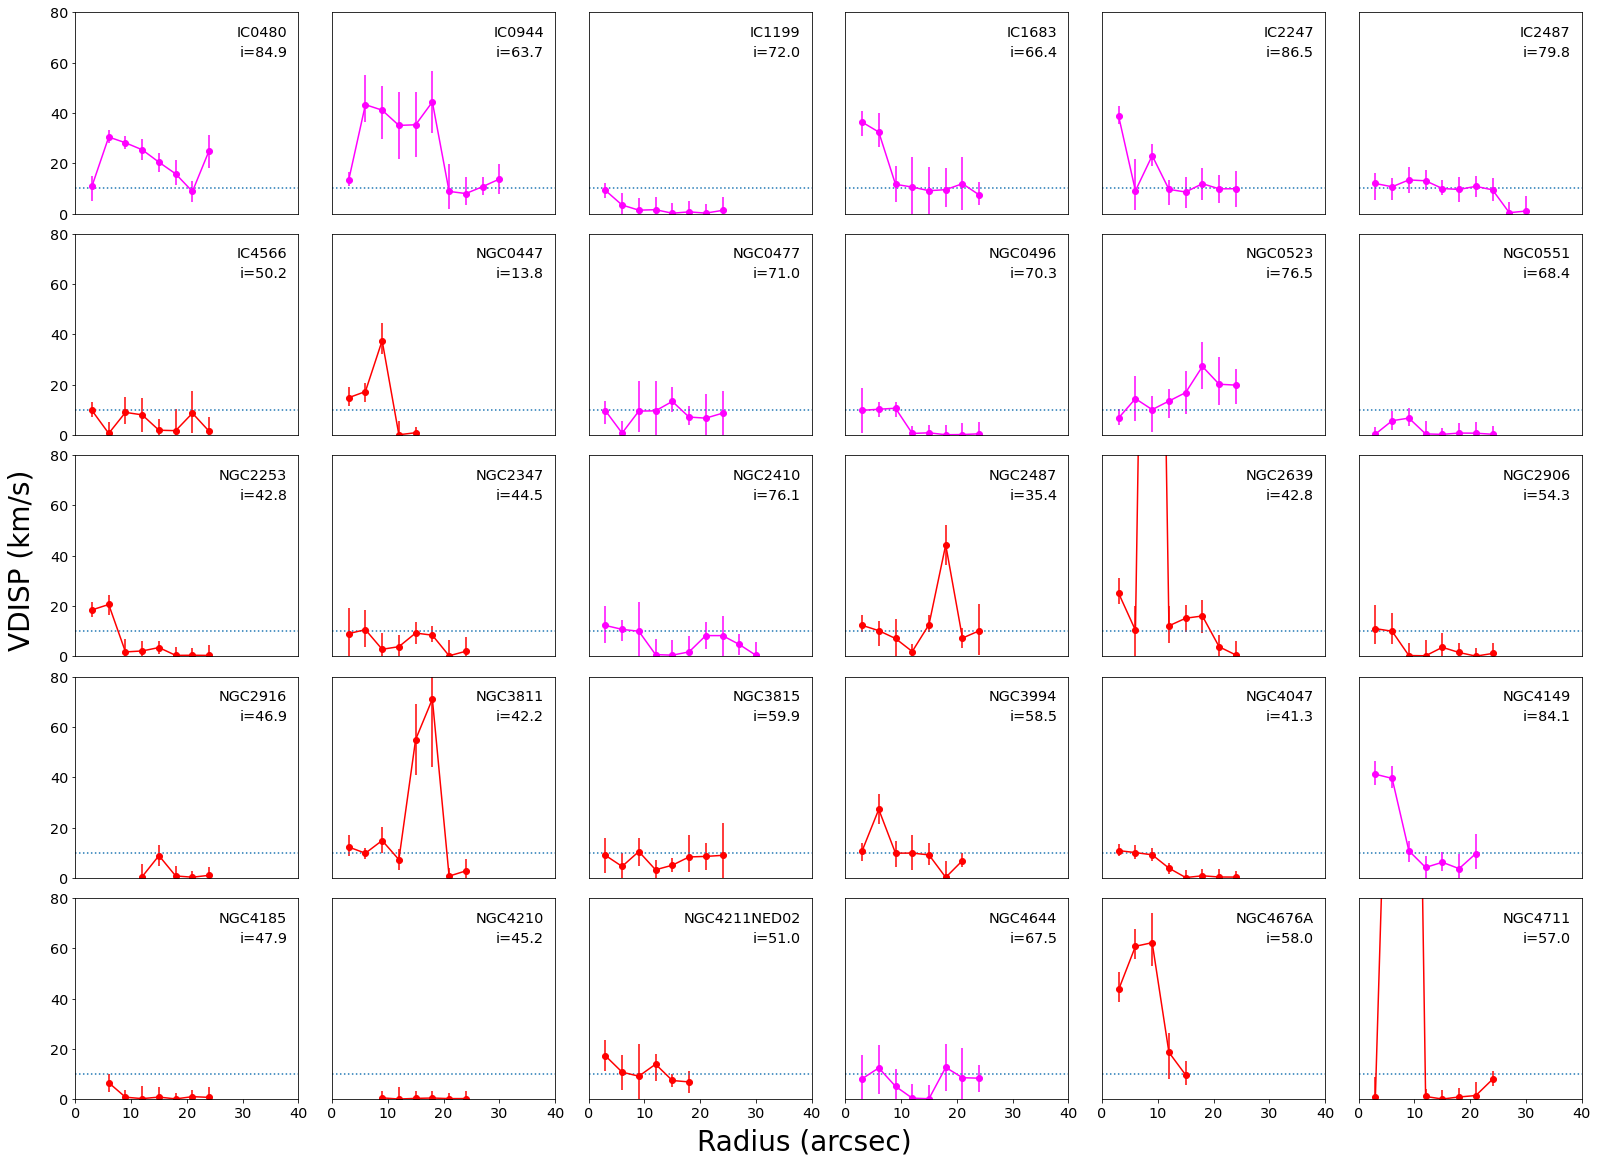

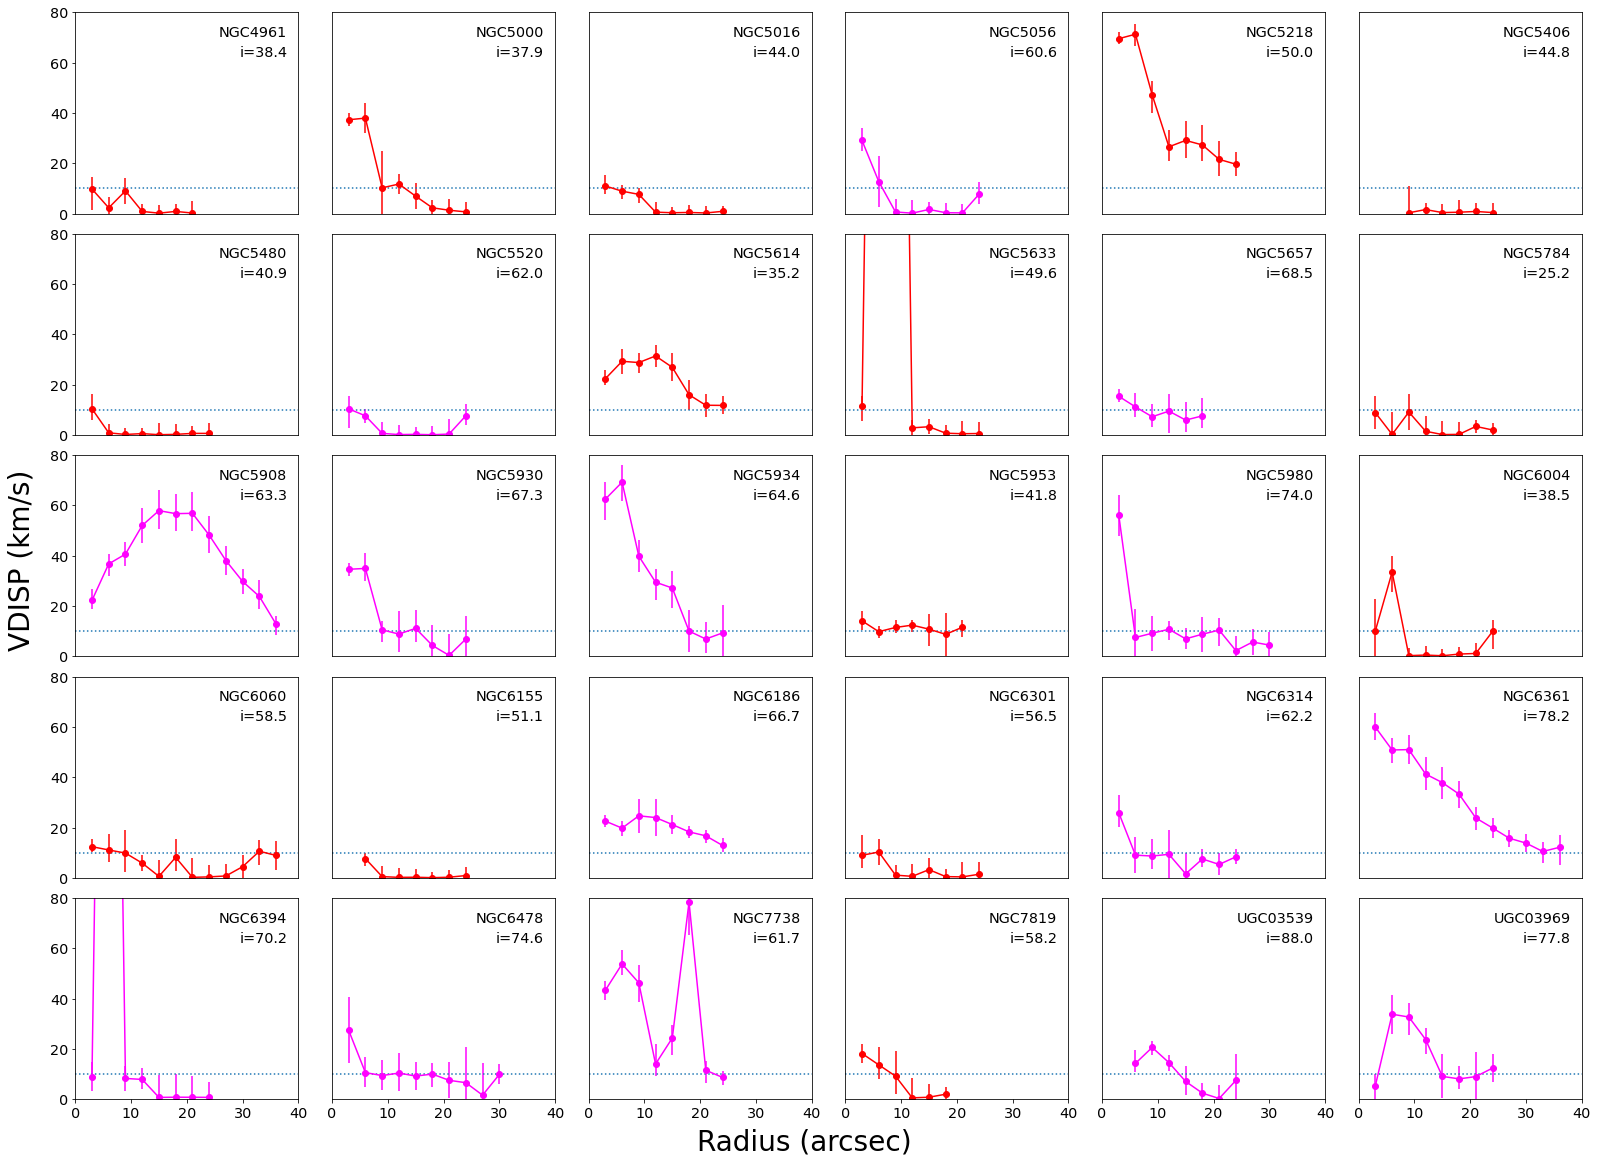

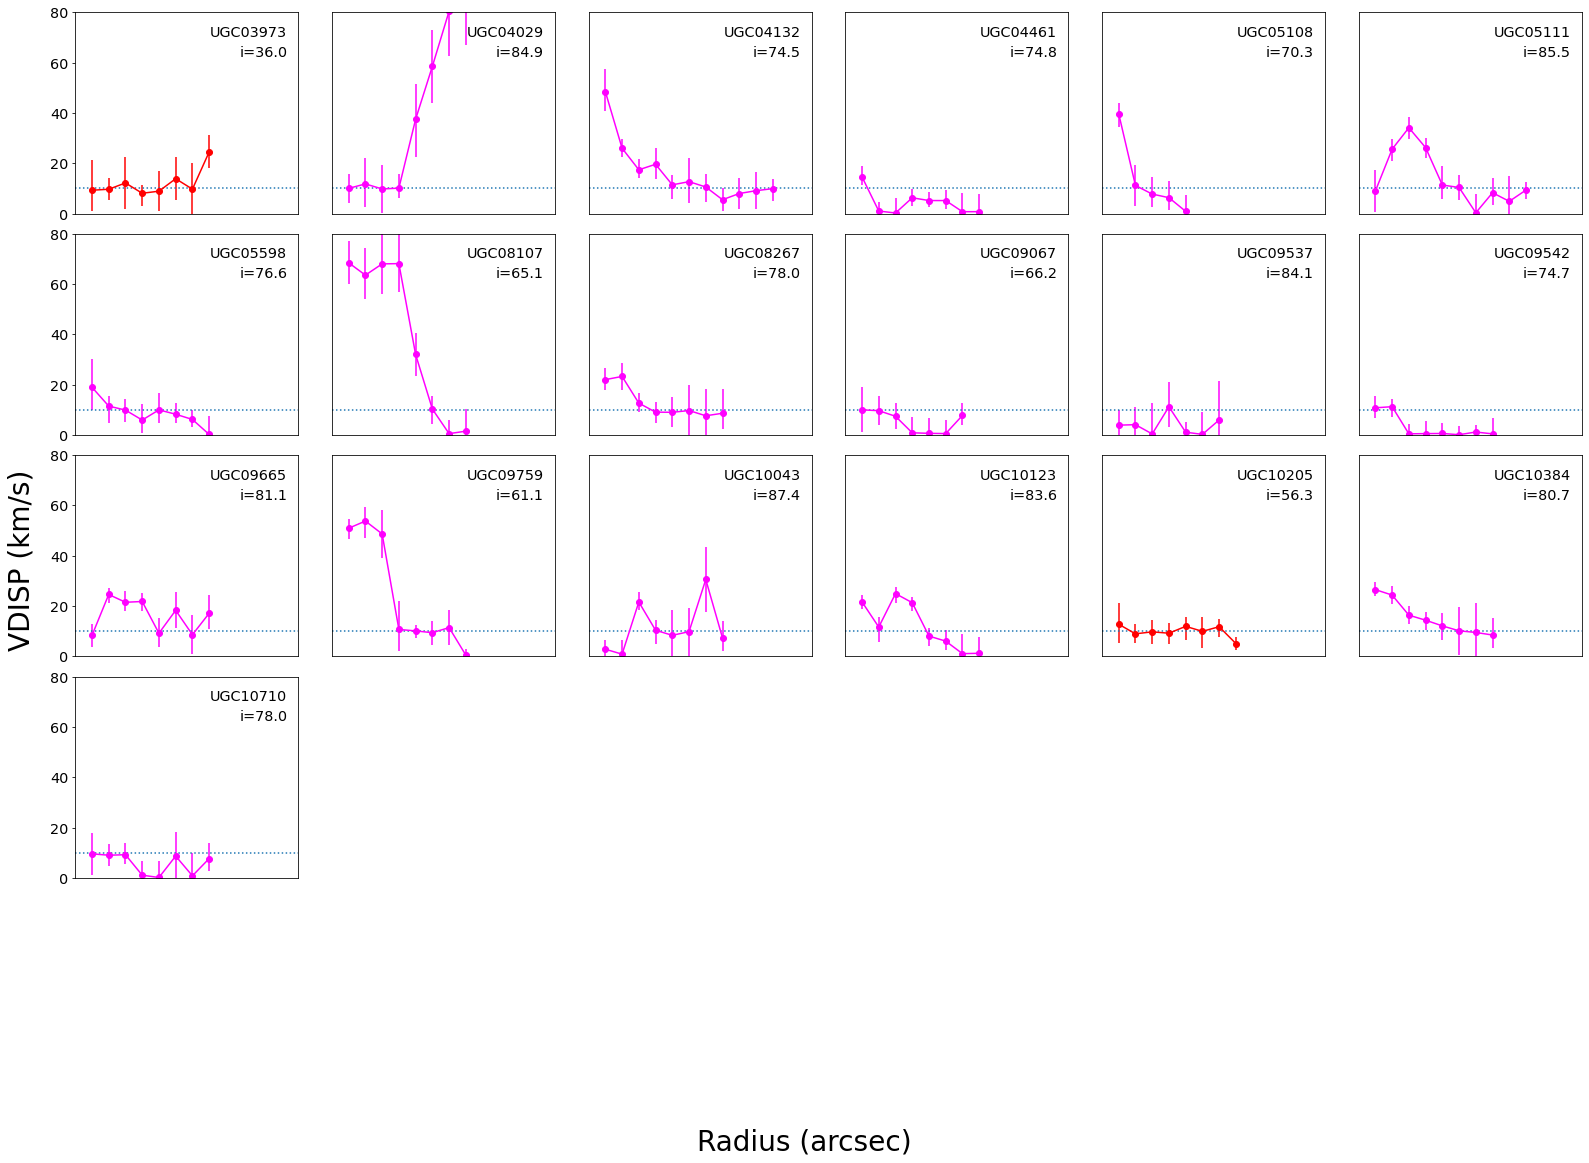

In [4]:
pages = int(np.ceil(float(len(gallist)) / (nx*ny)))

if pdfout:
    pp = PdfPages(outname)

for num in range(0,pages):
    aa = nx*ny*num
    bb = nx*ny+aa
    sublist = gallist[aa:bb]
    fig = plt.figure(0)
    fig.set_size_inches(nx*4.5, ny*4.)
    for idx, gal in enumerate(sublist):
        bbrows = bbtable[bbtable['Name']==gal]
        # Shift to top of bin
        bbrows['radius'] = bbrows['bbRad']+1.5
        row, col = divmod(idx,nx)
        ax = plt.subplot2grid((ny,nx),(row,col))
        # --- indicate highly inclined galaxies with magenta
        for i, vec in enumerate([bbrows['bbInc']]):
            if len(vec) > 0:
                if vec[0] > 60:
                    colr = 'magenta'
                else:
                    colr = 'red'
                ax.text(0.95,0.8,'i='+str(vec[0]),ha='right',va='center',
                        transform=ax.transAxes, fontsize='x-large')
        # --- for scaling to kpc
        if xtype == 'kpc':
            as2kpc = califa.loc[gal]['caDistMpc']/206.265
            for vec in [bbrows['radius']]:
                if len(vec) > 0:
                    vec *= as2kpc
        # --- plot the rotation curves
        ax.errorbar(bbrows['radius'],bbrows['bbVdisp'],
                    yerr=[abs(bbrows['bbVdisp_e1']),bbrows['bbVdisp_e2']],
                    c=colr,marker='o',label='Bbarolo')
        ax.axhline(10, ls=':')
        ax.set_xlim([0, xmax])
        ax.set_ylim([0, 80])
        ax.yaxis.set_major_locator(MultipleLocator(20))
#         if row == 0 and col == 0:
#             ax.legend(loc='lower right',fontsize='large')
        if (row != ny-1):
            ax.xaxis.set_ticks([])
        if (col != 0):
            ax.yaxis.set_ticks([])
        plt.text(0.95,0.9,gal,ha='right',va='center',transform=ax.transAxes,
           fontsize='x-large')
        ax.tick_params(axis='both', which='major', labelsize='x-large')
    fig.subplots_adjust(hspace=0.1)
    fig.subplots_adjust(wspace=0.15)
    if xtype == 'kpc':
        fig.text(0.5, 0.09, 'Radius (kpc)', ha='center', fontsize=28)
    else:
        fig.text(0.5, 0.09, 'Radius (arcsec)', ha='center', fontsize=28)
    ytxt = 'VDISP'
    fig.text(0.09, 0.5, ytxt+' (km/s)', va='center', rotation='vertical', 
                fontsize=28)
    if pdfout:
        pp.savefig(bbox_inches = 'tight', pad_inches=0.1)
        plt.close()
    else:
        plt.show()

if pdfout:
    d = pp.infodict()
    d['Title'] = 'EDGE Gallery'
    d['Author'] = os.getlogin()
    d['CreationDate'] = datetime.datetime.today()
    pp.close()